# 任务二：描述性统计分析与可视化（三选一）

（3）通过geopandas绘制房源分布图

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point  # 经纬度转换为点
plt.rcParams["font.sans-serif"] = ["SimHei"] # 中文显示
plt.rcParams["axes.unicode_minus"] = False # 负号显示

In [2]:
import os,sys
SRC_DIR = os.path.join(os.path.abspath('.'), 'data')
print(SRC_DIR)

c:\Users\Administrator\WPSDrive\205034987\WPS云盘\07 绛亽新学习\01 电子商务\05 20级大四上学期\商务智能实验\notebook\data


In [16]:
nbhd_gpd = gpd.GeoDataFrame.from_file(
    os.path.join(SRC_DIR, "_neighbourhoods.geojson"), encoding="utf-8"
)  # 读取数据为geodataframe格式

def df_to_gpd(df, label_longitude, label_latitude):
    df["geometry"] = list(zip(df[label_longitude], df[label_latitude]))
    df["geometry"] = df["geometry"].apply(Point)
    df = gpd.GeoDataFrame(df)
    del df[label_latitude]
    del df[label_longitude]
    return df


listings_df = pd.read_csv(os.path.join(SRC_DIR, "_listings.csv"))
listings_gpd = df_to_gpd(listings_df, "longitude", "latitude")

nbhd_groupby = listings_gpd.groupby("neighbourhood").size()  # Series格式
nbhd_groupby = nbhd_groupby.to_frame().reset_index()  # 转换为dataframe格式
nbhd_groupby.columns = ["neighbourhood", "count"]  # 更改列名，方便操作

reg = pd.merge(nbhd_gpd, nbhd_groupby, on="neighbourhood", how="left") # 合并 df
print(reg.head())
reg02 = reg.copy()


  neighbourhood                                           geometry  count
0           东城区  MULTIPOLYGON (((116.44231 39.90180, 116.44246 ...   3346
1           西城区  MULTIPOLYGON (((116.39155 39.89710, 116.39157 ...   1701
2           昌平区  MULTIPOLYGON (((116.04274 40.08406, 116.03750 ...   1034
3           大兴区  MULTIPOLYGON (((116.73473 39.62160, 116.69884 ...    823
4           房山区  MULTIPOLYGON (((116.24662 39.79181, 116.24320 ...    579


C:\Windows\Temp\ipykernel_13200\977212809.py:17: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  reg03['center']=reg03['geometry'].centroid #选取区域的中心点


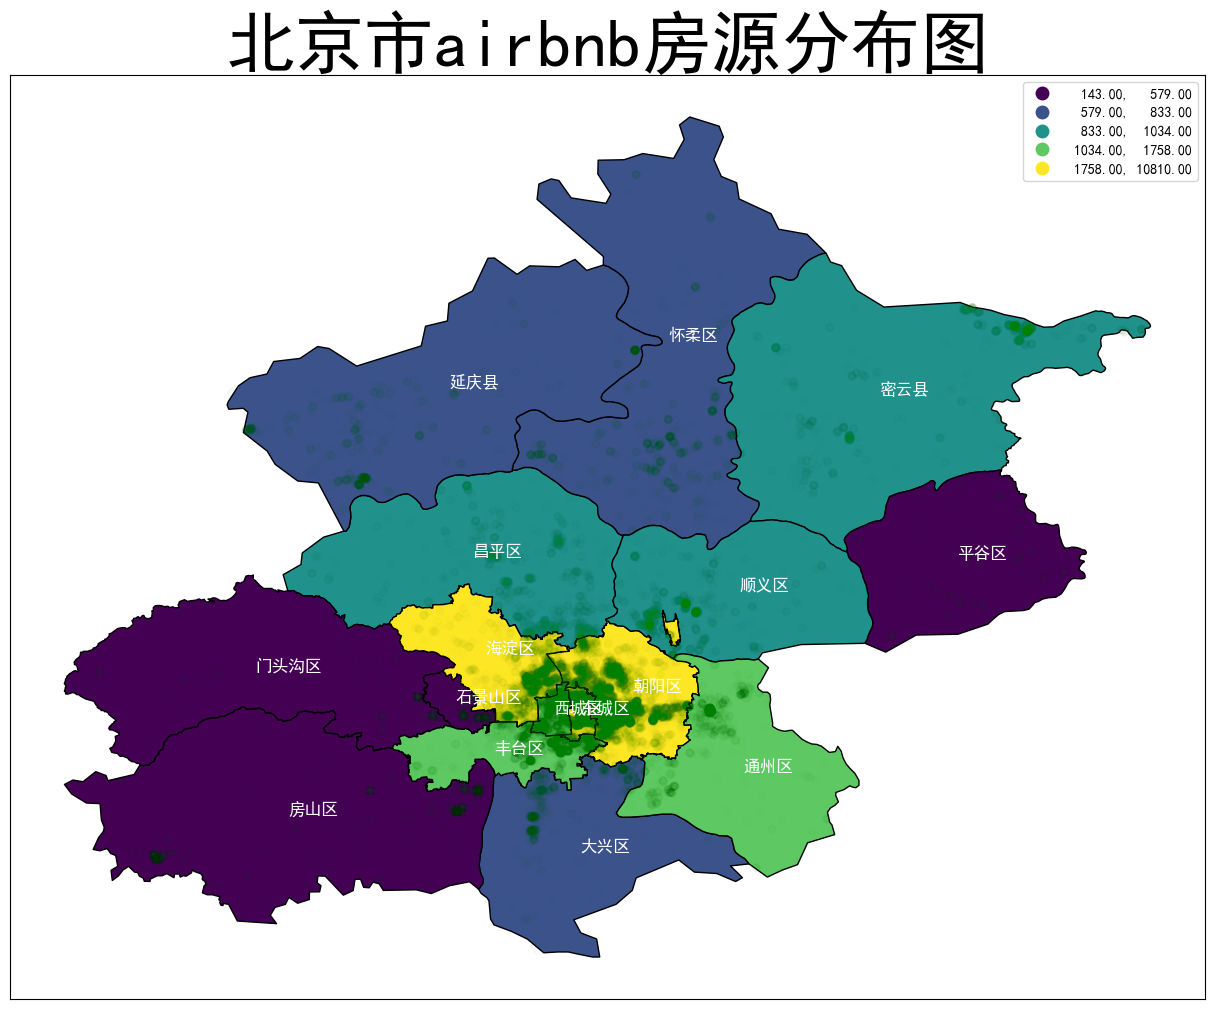

In [33]:
# 制图
reg02["coords"] = reg02["geometry"].apply(lambda x: x.representative_point().coords[0])
base = reg02.plot(
    column="count",
    cmap="viridis",
    scheme="quantiles",
    edgecolor="k",
    legend=True,
    figsize=(18, 12),
)
listings_gpd.plot(
    ax=base, color="green", marker="o", markersize=30, alpha=0.01
)  # 在底图上叠加房源点数据

reg03=reg.copy()

reg03['center']=reg03['geometry'].centroid #选取区域的中心点
reg03.set_geometry("center", inplace=True)
texts = []  #标注区域名称
for x, y, label in zip(reg03.geometry.x, reg03.geometry.y, reg03["neighbourhood"]):
    texts.append(plt.text(x, y, label, fontsize=12, fontweight="bold", color="white"))

plt.title("北京市airbnb房源分布图", fontsize=50)
plt.grid(True, alpha=0.31)  # 显示网格
plt.gca().xaxis.set_major_locator(plt.NullLocator())  # 去掉x轴刻度
plt.gca().yaxis.set_major_locator(plt.NullLocator())  # 去掉y轴刻度
plt.savefig(os.path.join(SRC_DIR, "_任务二（3）_北京市airbnb房源分布图.png"))
plt.show()

#
\- The End -